In [63]:
from keras.layers import Input, Dense
from keras.models import Model

In [64]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])

from keras.datasets import mnist, fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [65]:
autoencoder.fit(x_train, x_train, epochs=5, batch_size=256,shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 46us/step - loss: 0.5302 - accuracy: 0.4473 - val_loss: 0.4598 - val_accuracy: 0.4799
Epoch 2/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.4294 - accuracy: 0.4873 - val_loss: 0.4077 - val_accuracy: 0.4888
Epoch 3/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.3953 - accuracy: 0.4922 - val_loss: 0.3868 - val_accuracy: 0.4917
Epoch 4/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.3771 - accuracy: 0.4951 - val_loss: 0.3713 - val_accuracy: 0.4942
Epoch 5/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.3634 - accuracy: 0.4971 - val_loss: 0.3594 - val_accuracy: 0.4959


In [66]:
#predicting on the test data
prediction = autoencoder.predict(x_test)

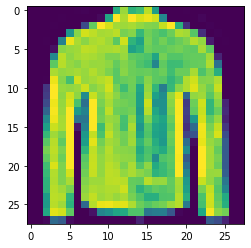

In [67]:
#Input Image
from matplotlib import pyplot as plt
plt.imshow(x_test[50].reshape(28,28))
plt.show()

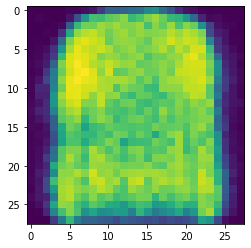

In [68]:
#reconstructed Image
from matplotlib import pyplot as plt
plt.imshow(prediction[50].reshape(28,28))
plt.show()

In [69]:
# this is our input placeholder
input_img = Input(shape=(784,))
#Adding hidden layer to encoding
hiddenLayer_en=Dense(512,activation='relu')(input_img)
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(hiddenLayer_en)
#Adding hidden layer to decoding
hiddenLayer_de=Dense(512,activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(hiddenLayer_de)


# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])


from keras.datasets import mnist, fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 159us/step - loss: 0.4817 - accuracy: 0.4608 - val_loss: 0.3921 - val_accuracy: 0.4917
Epoch 2/5
60000/60000 [==============================] - 9s 158us/step - loss: 0.3765 - accuracy: 0.4931 - val_loss: 0.3659 - val_accuracy: 0.4972
Epoch 3/5
60000/60000 [==============================] - 9s 157us/step - loss: 0.3547 - accuracy: 0.4975 - val_loss: 0.3458 - val_accuracy: 0.5001
Epoch 4/5
60000/60000 [==============================] - 9s 158us/step - loss: 0.3385 - accuracy: 0.5006 - val_loss: 0.3344 - val_accuracy: 0.4973
Epoch 5/5
60000/60000 [==============================] - 10s 160us/step - loss: 0.3284 - accuracy: 0.5022 - val_loss: 0.3298 - val_accuracy: 0.5029


In [70]:
#predicting on the test data
prediction = autoencoder.predict(x_test)

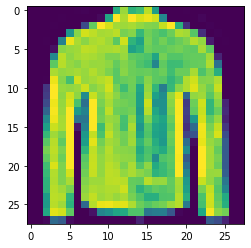

In [71]:
#Input Image
from matplotlib import pyplot as plt
plt.imshow(x_test[50].reshape(28,28))
plt.show()

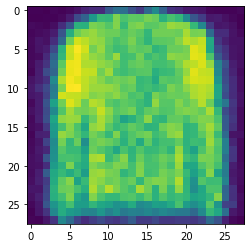

In [72]:
#reconstructed Image
from matplotlib import pyplot as plt
plt.imshow(prediction[50].reshape(28,28))
plt.show()

In [73]:
#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

history=autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 159us/step - loss: 0.3290 - accuracy: 0.5020 - val_loss: 0.3130 - val_accuracy: 0.0000e+00
Epoch 2/10
60000/60000 [==============================] - 10s 159us/step - loss: 0.3246 - accuracy: 0.5026 - val_loss: 0.3106 - val_accuracy: 0.0000e+00
Epoch 3/10
60000/60000 [==============================] - 10s 159us/step - loss: 0.3223 - accuracy: 0.5030 - val_loss: 0.3078 - val_accuracy: 0.0000e+00
Epoch 4/10
60000/60000 [==============================] - 10s 158us/step - loss: 0.3204 - accuracy: 0.5033 - val_loss: 0.3042 - val_accuracy: 0.0000e+00
Epoch 5/10
60000/60000 [==============================] - 10s 163us/step - loss: 0.3185 - accuracy: 0.5036 - val_loss: 0.3022 - val_accuracy: 0.0000e+00
Epoch 6/10
60000/60000 [==============================] - 10s 159us/step - loss: 0.3171 - accuracy: 0.5039 - val_loss: 0.3011 - val_accuracy: 0.0000e+00
Epoch 7/10
60000/60000 [========

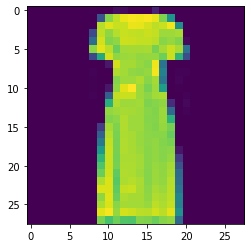

In [74]:
#Before applying Noise to data
from matplotlib import pyplot as plt
plt.imshow(x_train[50].reshape(28,28))
plt.show()

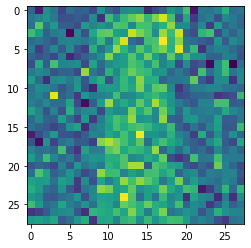

In [75]:
#After Applying Noise to data
from matplotlib import pyplot as plt
plt.imshow(x_train_noisy[50].reshape(28,28))
plt.show()

In [76]:
#predicting on the test data
prediction = autoencoder.predict(x_test_noisy) #prediction

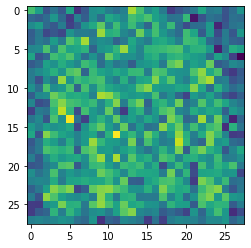

In [77]:
#Input Image After Noise to be predicted
from matplotlib import pyplot as plt
plt.imshow(x_test_noisy[50].reshape(28,28))
plt.show()

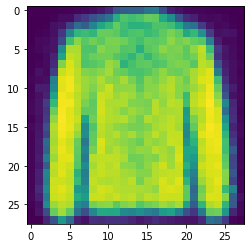

In [78]:
#reconstructed Image
from matplotlib import pyplot as plt
plt.imshow(prediction[50].reshape(28,28))
plt.show()

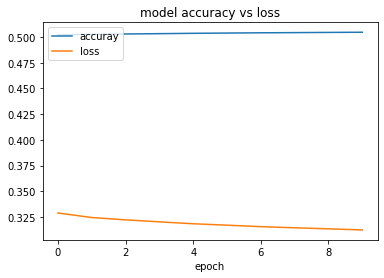

In [79]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy vs loss')
plt.xlabel('epoch')
plt.legend(['accuray','loss'], loc='upper left')
plt.show()